In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [6]:
df_Quan = pd.read_pickle('output/result_from_config_Quantum.pkl')
df_Clas = pd.read_pickle('output/result_from_config_Classical.pkl')

In [24]:
#functions
def double_roc(df1, title1, df2, title2):
    fpr1, tpr1, _ = roc_curve(df1['trueLabels'], df1['scores'])
    roc_auc1 = auc(fpr1, tpr1)
    fpr2, tpr2, _ = roc_curve(df2['trueLabels'], df2['scores'])
    roc_auc2 = auc(fpr2, tpr2)    
    plt.figure()
    lw = 2
    plt.plot(fpr1,
             tpr1,
             color="darkgreen",
             lw=lw,
             label=title1+"ROC curve (area = %0.2f)" % roc_auc1,
            )    
    plt.plot(fpr2,
             tpr2,
             color="darkorange",
             lw=lw,
             label=title2+"ROC curve (area = %0.2f)" % roc_auc2,
            ) 
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('Classical vs Quantum')
    plt.legend(loc="lower right")
    plt.show()    
    
def single_roc(df, title):
    fpr, tpr, _ = roc_curve(df['trueLabels'], df['scores'])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr,
             tpr,
             color="darkorange",
             lw=lw,
             label="ROC curve (area = %0.2f)" % roc_auc,
            )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

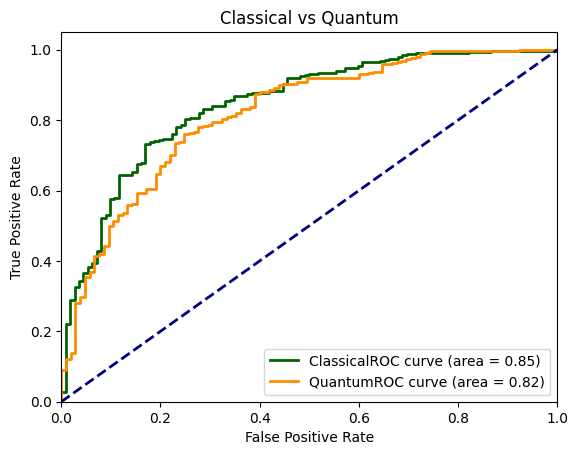

In [25]:
double_roc(df_Clas, 'Classical', df_Quan, 'Quantum')